住宅価格の予測

【問題1】練習のために特徴量の選択

In [1]:
# PandasのDataFrame型のtrain_dataに格納
import pandas as pd
import numpy as np

train_data=pd.read_csv("/Users/chidayasuhiro/diveintocode-ml/train.csv")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


【問題1】練習のために特徴量の選択

説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください

In [2]:
setsumei =train_data.loc[:,['GrLivArea','YearBuilt']]
mokuteki =train_data.loc[:,"SalePrice"]
chi=pd.concat([setsumei,mokuteki],axis=1)

chi

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


【問題2】線形回帰による推定と評価

In [3]:
from sklearn.model_selection import train_test_split
chi_np_sp=train_test_split(chi)

In [4]:
# 訓練用データ

chi_kunren=chi_np_sp[0]
chi_kunren_np=np.array(chi_kunren)
chi_kunren_xx=chi_kunren_np[:,0:2]
chi_kunren_yy=chi_kunren_np[:,2]

In [5]:
# 検証用データ

chi_kensyo=chi_np_sp[1]
chi_kensyo_np=np.array(chi_kensyo)

chi_kensyo_xx=chi_kensyo_np[:,0:2]
chi_kensyo_yy=chi_kensyo_np[:,2]

In [26]:
#　線形回帰による学習

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(chi_kunren_xx,chi_kunren_yy)
y_pred=reg.predict(chi_kensyo_xx)
y_pred

array([186922.49442882, 260290.57127057, 149123.46432155, 121940.14661621,
       141231.4450429 , 240877.56087345, 149123.46432155, 221774.45973602,
       252564.76528895, 131663.97233746, 241995.8176434 , 277634.14646864,
        57282.29684459, 210894.20444481,  89102.38985644, 210370.25044738,
       150206.01336179, 166035.95163166, 189047.68962166, 129013.95810339,
       111528.61867081, 103802.81268919, 159645.4455702 , 192506.58470816,
       117794.94769153, 283142.95783228, 133206.45512662, 136036.93973738,
       218615.61362799, 256015.40012073, 120806.23438063, 259512.46800725,
       235226.9852753 , 142482.13910831, 227771.51736738, 143817.97237063,
       226155.68739066, 298824.2699989 , 137740.70568296, 119868.77968902,
       185358.02764745, 147557.93085585, 206786.64497797, 316331.5934237 ,
       115892.25913168, 148988.02861362, 229796.45123983, 119661.06347786,
       223690.87203337, 194971.40006546, 117702.08158206, 157297.41204273,
       221754.40747194, 1

In [27]:
#　評価

from sklearn.metrics import mean_squared_error
mean_squared_error(chi_kensyo_yy, y_pred)


1876664363.8925722

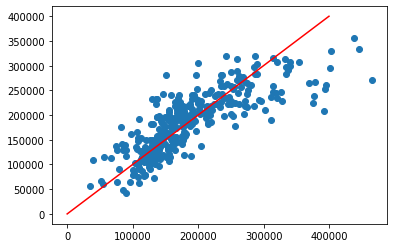

In [39]:
#　可視化

import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.arange(0,500000,100000)
y1=x1

plt.scatter(chi_kensyo_yy,y_pred)
plt.plot(x1,y1,color="red")
plt.show()

【問題3】手法の比較

＜SVM＞

In [68]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#　標準化
chi_kunren_xx=chi_kunren_xx.astype(np.float64)

scaler = StandardScaler()
scaler.fit(chi_kunren_xx)
chi_kunren_xx_std=scaler.transform(chi_kunren_xx)

chi_kensyo_xx=chi_kensyo_xx.astype(np.float64)

scaler = StandardScaler()
scaler.fit(chi_kensyo_xx)
chi_kensyo_xx_std=scaler.transform(chi_kensyo_xx)


#　学習
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(chi_kunren_xx_std,chi_kunren_yy)

y_pred=regr.predict(chi_kensyo_xx_std)

In [70]:
#　評価

from sklearn.metrics import mean_squared_error
mean_squared_error(chi_kensyo_yy, y_pred)

5844177267.376383

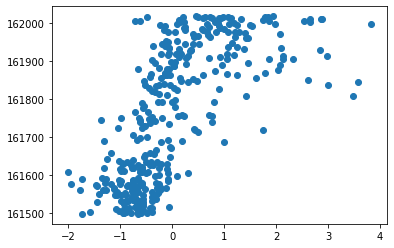

In [94]:
#　可視化

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(chi_kensyo_yy1_std,y_pred)
plt.show()

＜決定木＞

In [100]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(chi_kunren_xx,chi_kunren_yy)

y_pred_tree=regressor.predict(chi_kensyo_xx)

In [101]:
#　評価

from sklearn.metrics import mean_squared_error
mean_squared_error(chi_kensyo_yy, y_pred_tree)

2556411766.6907153

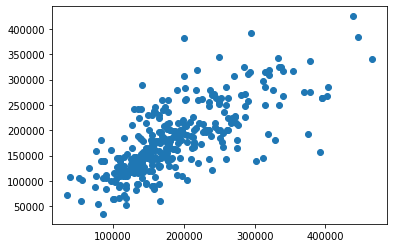

In [102]:
#　可視化

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(chi_kensyo_yy,y_pred_tree)
plt.show()

＜ランダムフォレスト＞

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(chi_kunren_xx,chi_kunren_yy)

y_pred_random=regr.predict(chi_kensyo_xx)

In [107]:
#　評価

from sklearn.metrics import mean_squared_error
mean_squared_error(chi_kensyo_yy, y_pred_random)

2097523162.6077576

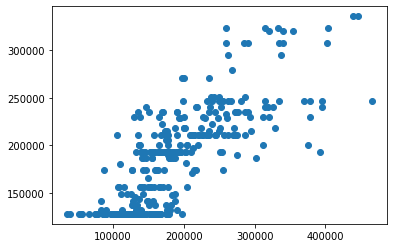

In [108]:
#　可視化

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(chi_kensyo_yy,y_pred_random)
plt.show()

In [113]:
# 指標表

import pandas as pd
shihyo2=[1876664363.8925722,5844177267.376383,2556411766.6907153,2097523162.6077576]
'MSE'
pd.DataFrame(shihyo2,columns=["MSE"],index=["線形回帰","SVM","決定木","ランダムフォレスト"])

,MSE
線形回帰,1.876664e+09
SVM,5.844177e+09
決定木,2.556412e+09
ランダムフォレスト,2.097523e+09


結果を簡単に考察

MSEと散布図で比べた結果、線形回帰が最も良い分析となった。
SVMは４つの中で比較すると、かなり悪いものである結果となった。

【問題4】（アドバンス課題）他の特徴量も使用しての学習

追加の特徴量として「LotArea」を加えて線形回帰分析を行う

In [114]:
# 「LotArea」を加える

setsumei2 =train_data.loc[:,['GrLivArea','YearBuilt','LotArea']]
mokuteki2 =train_data.loc[:,"SalePrice"]
chi2=pd.concat([setsumei2,mokuteki2],axis=1)

chi2

,GrLivArea,YearBuilt,LotArea,SalePrice
0,1710,2003,8450,208500
1,1262,1976,9600,181500
2,1786,2001,11250,223500
3,1717,1915,9550,140000
4,2198,2000,14260,250000
...,...,...,...,...
1455,1647,1999,7917,175000
1456,2073,1978,13175,210000
1457,2340,1941,9042,266500
1458,1078,1950,9717,142125


In [115]:
from sklearn.model_selection import train_test_split
chi2_np_sp=train_test_split(chi2)

In [116]:
# 訓練用データ

chi2_kunren=chi2_np_sp[0]
chi2_kunren_np=np.array(chi2_kunren)
chi2_kunren_xx=chi2_kunren_np[:,0:2]
chi2_kunren_yy=chi2_kunren_np[:,2]

In [117]:
# 検証用データ

chi2_kensyo=chi2_np_sp[1]
chi2_kensyo_np=np.array(chi2_kensyo)

chi2_kensyo_xx=chi2_kensyo_np[:,0:2]
chi2_kensyo_yy=chi2_kensyo_np[:,2]

In [119]:
#　線形回帰による学習

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(chi2_kunren_xx,chi2_kunren_yy)
y_pred=reg.predict(chi2_kensyo_xx)

In [121]:
#　評価

from sklearn.metrics import mean_squared_error
mean_squared_error(chi2_kensyo_yy, y_pred)

165634704.88755912

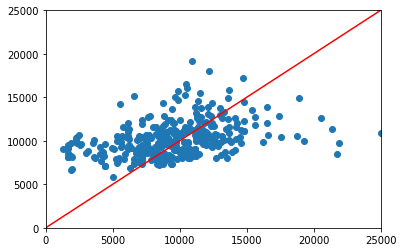

In [130]:
#　可視化

import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.arange(0,30000,5000)
y1=x1

plt.scatter(chi2_kensyo_yy,y_pred)
plt.xlim([0,25000])
plt.ylim([0,25000])
plt.plot(x1,y1,color="red")
plt.show()

＜検証　考察＞

特徴量に「LotArea」を入れたが、MESを見ると、少し精度が上昇したようであった。

作図を見ると、視覚からも少し上昇したように思える。

説明変数としてこれよりも良い変数もまだあるかと思われる。
今後の課題として、よりより説明変数を探索していきたい。